# Short beam Quantum Radiation Reaction - Longitudinal displacement $\Delta_\parallel$

In [1]:
import os
import sys
sys.path.append('../QScatter')
import QScatter
from QScatter import *

In [2]:
# da = 0.2
files_electrons = glob.glob('PW/a*-electrons-*103.h5')
files_electrons.sort()
enelst = np.linspace(1,5000,200)
enedist_electrons = np.zeros((len(files_electrons),len(enelst)-1))
for i in range(len(files_electrons)):
    filef = h5py.File(files_electrons[i], 'r')
    enedist = np.array(filef['ene'])
    qdist = np.array(filef['q'])*-1
    enedist_ytmp, enedist_xtmp = np.histogram(enedist, enelst, weights = qdist)
    enedist_sim_y1, enedist_sim_x = enedist_ytmp, arraycenter(enedist_xtmp)
    enedist_electrons[i,:] = enedist_sim_y1
    
files = glob.glob('PW/a*-photons-*103.h5')
files.sort()
enedist_photons = np.zeros_like(enedist_electrons)
for i in range(len(files)):
    filef = h5py.File(files[i], 'r')
    enedist = np.array(filef['ene'])
    #print(np.max(enedist))
    qdist = np.array(filef['q'])
    enedist_ytmp, enedist_xtmp = np.histogram(enedist, enelst, weights = qdist)
    enedist_sim_y1, enedist_sim_x = enedist_ytmp, arraycenter(enedist_xtmp)
    enedist_photons[i,:] = enedist_sim_y1

In [3]:
# parameters
# laser
lbd = 0.8; #[\mu m]
a0 = 12 #[]
W0 = 2.4; #[\mu m]
zR = pi*W0**2/lbd; #[\mu m]

# beam
g0 = 5000; #[]
R = 13.33/18.85 * W0 * np.sqrt(2); #[\mu m]
#lonrise = 50 #[1/wp]

def dNda(a,dpll):
    fact = np.sqrt(1+(dpll/ (zR*18.85/2.4)  )**2 )
    W = W0*fact
    a0max = a0/fact
    if a <= a0max: #0.5*dpll <= zR*np.sqrt(a0**2/a**2-1):
        return (W0/R)**2 /a * (a/a0 * fact)**((W0/R)**2 * fact**2)
    else:
        return 0

a0lst = np.arange(0.2,12.1,0.2)
dNda000 = np.array([dNda(a,0) for a in a0lst])
dNda089 = np.array([dNda(a,89) for a in a0lst])
dNda178 = np.array([dNda(a,178) for a in a0lst])
dNda267 = np.array([dNda(a,267) for a in a0lst])

dNda000 = dNda000/np.trapz(dNda000,a0lst)
dNda089 = dNda089/np.trapz(dNda089,a0lst)
dNda178 = dNda178/np.trapz(dNda178,a0lst)
dNda267 = dNda267/np.trapz(dNda267,a0lst)

# electrons
dNdg = np.zeros(len(enelst)-1)
for i in range(len(files_electrons)):
    dNdg = dNdg + dNda000[i] * enedist_electrons[i,:]
dNdg000 = dNdg/np.trapz(dNda000,a0lst)

dNdg = np.zeros(len(enelst)-1)
for i in range(len(files_electrons)):
    dNdg = dNdg + dNda089[i] * enedist_electrons[i,:]
dNdg089 = dNdg/np.trapz(dNda089,a0lst)

dNdg = np.zeros(len(enelst)-1)
for i in range(len(files_electrons)):
    dNdg = dNdg + dNda178[i] * enedist_electrons[i,:]
dNdg178 = dNdg/np.trapz(dNda178,a0lst)

dNdg = np.zeros(len(enelst)-1)
for i in range(len(files_electrons)):
    dNdg = dNdg + dNda267[i] * enedist_electrons[i,:]
dNdg267 = dNdg/np.trapz(dNda267,a0lst)

# photons
dNdg = np.zeros(len(enelst)-1)
for i in range(len(files_electrons)):
    dNdg = dNdg + dNda000[i] * enedist_photons[i,:]
dNdg000g = dNdg/np.trapz(dNda000,a0lst)

dNdg = np.zeros(len(enelst)-1)
for i in range(len(files_electrons)):
    dNdg = dNdg + dNda089[i] * enedist_photons[i,:]
dNdg089g = dNdg/np.trapz(dNda089,a0lst)

dNdg = np.zeros(len(enelst)-1)
for i in range(len(files_electrons)):
    dNdg = dNdg + dNda178[i] * enedist_photons[i,:]
dNdg178g = dNdg/np.trapz(dNda178,a0lst)

dNdg = np.zeros(len(enelst)-1)
for i in range(len(files_electrons)):
    dNdg = dNdg + dNda267[i] * enedist_photons[i,:]
dNdg267g = dNdg/np.trapz(dNda267,a0lst)

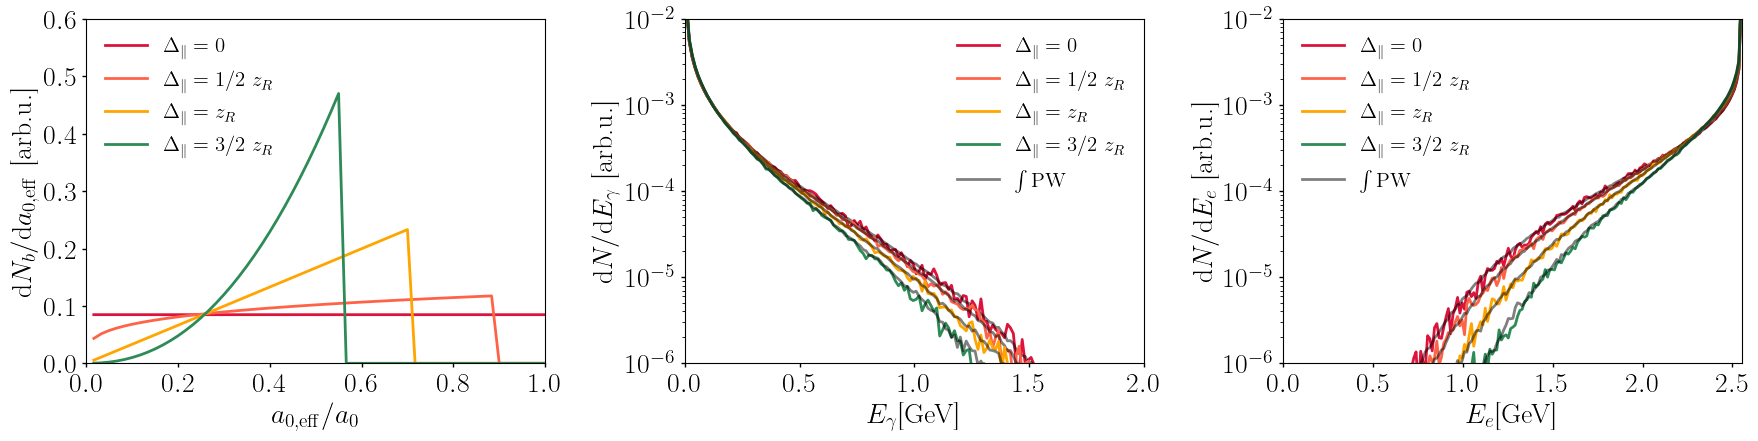

In [5]:
# plot 
plt.style.use("../reduQED/style.txt")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,4.7))

axes[0].plot(a0lst/a0, dNda000/np.trapz(dNda000,a0lst), label=r'$\Delta_\parallel=0$')
axes[0].plot(a0lst/a0, dNda089/np.trapz(dNda089,a0lst), label=r'$\Delta_\parallel=1/2 ~z_R$')
axes[0].plot(a0lst/a0, dNda178/np.trapz(dNda178,a0lst), label=r'$\Delta_\parallel=z_R$')
axes[0].plot(a0lst/a0, dNda267/np.trapz(dNda267,a0lst), label=r'$\Delta_\parallel=3/2 ~z_R$')
axes[0].legend(loc='upper left', fontsize=15, frameon=False)
axes[0].set_xlabel(r'$a_{0,\mathrm{eff}}/a_0$')
axes[0].set_ylabel(r'$\mathrm{d}N_b/\mathrm{d}a_{0,\mathrm{eff}}$ [arb.u.]')
axes[0].set_xticks([0,0.2,0.4,0.6,0.8,1.0])
axes[0].set_ylim([0,0.6])
#axes[0].title(r'Short beam: $\lambda=0.8~\mu\mathrm{m},W_0=R=2.4~\mu\mathrm{m}$')

# photons
dNdgscale = 0.8
#
filef = h5py.File('GaussianDeltaPll/deltapll000_RAW-photons-000600.h5', 'r')
enedist = np.array(filef['ene'])
qdist = np.abs(np.array(filef['q']))
enedist_ytmp, enedist_xtmp = np.histogram(enedist, enelst, weights = qdist)
enedist_sim_y1, enedist_sim_x = enedist_ytmp, arraycenter(enedist_xtmp)
axes[1].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_sim_y1/np.trapz(enedist_sim_y1,enedist_sim_x), label=r'$\Delta_\parallel = 0$'  )
axes[1].plot(enedist_sim_x*(0.511e6)*1e-9, dNdg000g/np.trapz(dNdg000g,enedist_sim_x), 'k-', alpha=0.5)
#
filef = h5py.File('GaussianDeltaPll/deltapll089_RAW-photons-000600.h5', 'r')
enedist = np.array(filef['ene'])
qdist = np.abs(np.array(filef['q']))
enedist_ytmp, enedist_xtmp = np.histogram(enedist, enelst, weights = qdist)
enedist_sim_y1, enedist_sim_x = enedist_ytmp, arraycenter(enedist_xtmp)
axes[1].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_sim_y1/np.trapz(enedist_sim_y1,enedist_sim_x), label=r'$\Delta_\parallel = 1/2~z_R$'  )
axes[1].plot(enedist_sim_x*(0.511e6)*1e-9, dNdg089g/np.trapz(dNdg089g,enedist_sim_x), 'k-', alpha=0.5)
#
filef = h5py.File('GaussianDeltaPll/deltapll178_RAW-photons-000600.h5', 'r')
enedist = np.array(filef['ene'])
qdist = np.abs(np.array(filef['q']))
enedist_ytmp, enedist_xtmp = np.histogram(enedist, enelst, weights = qdist)
enedist_sim_y1, enedist_sim_x = enedist_ytmp, arraycenter(enedist_xtmp)
axes[1].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_sim_y1/np.trapz(enedist_sim_y1,enedist_sim_x), label=r'$\Delta_\parallel = z_R$'  )
axes[1].plot(enedist_sim_x*(0.511e6)*1e-9, dNdg178g/np.trapz(dNdg178g,enedist_sim_x), 'k-', alpha=0.5)
#
filef = h5py.File('GaussianDeltaPll/deltapll267_RAW-photons-000600.h5', 'r')
enedist = np.array(filef['ene'])
qdist = np.abs(np.array(filef['q']))
enedist_ytmp, enedist_xtmp = np.histogram(enedist, enelst, weights = qdist)
enedist_sim_y1, enedist_sim_x = enedist_ytmp, arraycenter(enedist_xtmp)
axes[1].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_sim_y1/np.trapz(enedist_sim_y1,enedist_sim_x), label=r'$\Delta_\parallel = 3/2~z_R$'  )
axes[1].plot(enedist_sim_x*(0.511e6)*1e-9, dNdg267g/np.trapz(dNdg267g,enedist_sim_x), 'k-', alpha=0.5, label=r'$\int \mathrm{PW}$')
#
axes[1].set_yscale('log')
axes[1].legend(loc='upper right', frameon=False)
axes[1].set_xlim([0,5000*(0.511e6)*1e-9])
axes[1].set_ylim([1e-6,1e-2])
axes[1].set_xlabel(r'$E_\gamma$[GeV]')
axes[1].set_ylabel(r'$\mathrm{d}N/\mathrm{d}E_\gamma$ [arb.u.]')
axes[1].set_xlim([0,2])
#axes[1].set_xticks([0,0.5,1,1.5,2,2.5])
#axes[1].title(r'G: $\gamma_e=5000, \lambda=0.8~\mu\mathrm{m}, \tau_\mathrm{rise} = 50~\omega_p^{-1} $')


#electrons 
dNdgscale = 0.8
filef = h5py.File('GaussianDeltaPll/deltapll000_RAW-electrons-000600.h5', 'r')
enedist = np.array(filef['ene'])
qdist = np.abs(np.array(filef['q']))
enedist_ytmp, enedist_xtmp = np.histogram(enedist, enelst, weights = qdist)
enedist_sim_y1, enedist_sim_x = enedist_ytmp, arraycenter(enedist_xtmp)
axes[2].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_sim_y1/np.trapz(enedist_sim_y1,enedist_sim_x), label=r'$\Delta_\parallel = 0$'  )
axes[2].plot(enedist_sim_x*(0.511e6)*1e-9, dNdg000/np.trapz(dNdg000,enedist_sim_x), 'k-', alpha=0.5)
#
filef = h5py.File('GaussianDeltaPll/deltapll089_RAW-electrons-000600.h5', 'r')
enedist = np.array(filef['ene'])
qdist = np.abs(np.array(filef['q']))
enedist_ytmp, enedist_xtmp = np.histogram(enedist, enelst, weights = qdist)
enedist_sim_y1, enedist_sim_x = enedist_ytmp, arraycenter(enedist_xtmp)
axes[2].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_sim_y1/np.trapz(enedist_sim_y1,enedist_sim_x), label=r'$\Delta_\parallel = 1/2~z_R$'  )
axes[2].plot(enedist_sim_x*(0.511e6)*1e-9, dNdg089/np.trapz(dNdg089,enedist_sim_x), 'k-', alpha=0.5)
#
filef = h5py.File('GaussianDeltaPll/deltapll178_RAW-electrons-000600.h5', 'r')
enedist = np.array(filef['ene'])
qdist = np.abs(np.array(filef['q']))
enedist_ytmp, enedist_xtmp = np.histogram(enedist, enelst, weights = qdist)
enedist_sim_y1, enedist_sim_x = enedist_ytmp, arraycenter(enedist_xtmp)
axes[2].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_sim_y1/np.trapz(enedist_sim_y1,enedist_sim_x), label=r'$\Delta_\parallel = z_R$'  )
axes[2].plot(enedist_sim_x*(0.511e6)*1e-9, dNdg178/np.trapz(dNdg178,enedist_sim_x), 'k-', alpha=0.5)
#
filef = h5py.File('GaussianDeltaPll/deltapll267_RAW-electrons-000600.h5', 'r')
enedist = np.array(filef['ene'])
qdist = np.abs(np.array(filef['q']))
enedist_ytmp, enedist_xtmp = np.histogram(enedist, enelst, weights = qdist)
enedist_sim_y1, enedist_sim_x = enedist_ytmp, arraycenter(enedist_xtmp)
axes[2].plot(enedist_sim_x*(0.511e6)*1e-9, enedist_sim_y1/np.trapz(enedist_sim_y1,enedist_sim_x), label=r'$\Delta_\parallel = 3/2~z_R$'  )
axes[2].plot(enedist_sim_x*(0.511e6)*1e-9, dNdg267/np.trapz(dNdg267,enedist_sim_x), 'k-', alpha=0.5, label=r'$\int \mathrm{PW}$')
#
axes[2].legend(loc='upper left', frameon=False)
axes[2].set_yscale('log')
axes[2].set_xlim([0,5000*(0.511e6)*1e-9])
axes[2].set_ylim([1e-6,1e-2])
axes[2].set_xlabel(r'$E_e$[GeV]')
axes[2].set_ylabel(r'$\mathrm{d}N/\mathrm{d}E_e$ [arb.u.]')
axes[2].set_xticks([0,0.5,1,1.5,2,2.5])
#axes[2].title(r'G: $\gamma_e=5000, \lambda=0.8~\mu\mathrm{m}, \tau_\mathrm{rise} = 50~\omega_p^{-1} $')

# aspect
for i in range(3):
    xmin, xmax = axes[i].get_xlim()
    ymin, ymax = axes[i].get_ylim()
    if i==0:
        axesratio = (ymax-ymin)/(xmax-xmin)
    else:
        axesratio = (np.log10(ymax)-np.log10(ymin))/(xmax-xmin)
    axes[i].set_aspect(aspect=3/4/axesratio)

plt.tight_layout()
plt.savefig('GaussianDeltaPll.pdf',transparent=True)
plt.show()